# Analysis of Titanic database

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(9, 5)})

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Dataset from [this Kaggle page](https://www.kaggle.com/competitions/titanic/data).

In [19]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
df['sex_target'] = [1 if el == 'male' else 0 for el in df['sex']]
df['adult_male_target'] = [1 if el == True else 0 for el in df['adult_male']]
df['alive_target'] = [1 if el == 'yes' else 0 for el in df['alive']]
df['alone_target'] = [1 if el == True else 0 for el in df['alone']]

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_target,adult_male_target,alive_target,alone_target
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,1,0,1


In [30]:
df = df[['survived', 'pclass', 'sex_target', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'adult_male_target', 'deck', 'alive_target', 'alone_target']]

In [31]:
df.head()

,survived,pclass,sex_target,age,sibsp,parch,fare,embarked,who,adult_male_target,deck,alive_target,alone_target
0,0,3,1,22.0,1,0,7.2500,S,man,1,NaN,0,0
1,1,1,0,38.0,1,0,71.2833,C,woman,0,C,1,0
2,1,3,0,26.0,0,0,7.9250,S,woman,0,NaN,1,1
3,1,1,0,35.0,1,0,53.1000,S,woman,0,C,1,0
4,0,3,1,35.0,0,0,8.0500,S,man,1,NaN,0,1


1. Familiarising myself with the data.

In [28]:
df.dtypes

survived                int64
pclass                  int64
sex_target              int64
age                   float64
sibsp                   int64
parch                   int64
fare                  float64
embarked               object
class                category
who                    object
adult_male_target       int64
deck                 category
alive_target            int64
alone_target            int64
dtype: object

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,False,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True,0,0,1


In [32]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [33]:
df = df[~pd.isna(df.deck)]

In [34]:
df['deck'].unique()

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

2. Looked at the predictors that are available and decided which to include in the model (*categorical variables need to be converted to dummies first*).

In [35]:
df = pd.get_dummies(df, columns=["deck"])

In [36]:
df.head()

,survived,pclass,sex_target,age,sibsp,parch,fare,embarked,who,adult_male_target,alive_target,alone_target,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
1,1,1,0,38.0,1,0,71.2833,C,woman,0,1,0,0,0,1,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,S,woman,0,1,0,0,0,1,0,0,0,0
6,0,1,1,54.0,0,0,51.8625,S,man,1,0,1,0,0,0,0,1,0,0
10,1,3,0,4.0,1,1,16.7000,S,child,0,1,0,0,0,0,0,0,0,1
11,1,1,0,58.0,0,0,26.5500,S,woman,0,1,1,0,0,1,0,0,0,0


In [37]:
df = pd.get_dummies(df, columns=["who"])

In [38]:
df.head()

,survived,pclass,sex_target,age,sibsp,parch,fare,embarked,adult_male_target,alive_target,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,who_child,who_man,who_woman
1,1,1,0,38.0,1,0,71.2833,C,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,1,...,0,0,1,0,0,0,0,0,0,1
6,0,1,1,54.0,0,0,51.8625,S,1,0,...,0,0,0,0,1,0,0,0,1,0
10,1,3,0,4.0,1,1,16.7000,S,0,1,...,0,0,0,0,0,0,1,1,0,0
11,1,1,0,58.0,0,0,26.5500,S,0,1,...,0,0,1,0,0,0,0,0,0,1


In [39]:
df = pd.get_dummies(df, columns=["embarked"])

In [40]:
df.head()

,survived,pclass,sex_target,age,sibsp,parch,fare,adult_male_target,alive_target,alone_target,...,deck_D,deck_E,deck_F,deck_G,who_child,who_man,who_woman,embarked_C,embarked_Q,embarked_S
1,1,1,0,38.0,1,0,71.2833,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1,1,0,35.0,1,0,53.1000,0,1,0,...,0,0,0,0,0,0,1,0,0,1
6,0,1,1,54.0,0,0,51.8625,1,0,1,...,0,1,0,0,0,1,0,0,0,1
10,1,3,0,4.0,1,1,16.7000,0,1,0,...,0,0,0,1,1,0,0,0,0,1
11,1,1,0,58.0,0,0,26.5500,0,1,1,...,0,0,0,0,0,0,1,0,0,1


3. Checked for the possibility of multicollinearity between the regressors.

In [43]:
df.corr().sort_values('survived', ascending=False)

,survived,pclass,sex_target,age,sibsp,parch,fare,adult_male_target,alive_target,alone_target,...,deck_D,deck_E,deck_F,deck_G,who_child,who_man,who_woman,embarked_C,embarked_Q,embarked_S
survived,1.000000,-0.035825,-0.545595,-0.241600,0.128490,0.034105,0.125201,-0.593645,1.000000,-0.153602,...,0.082101,0.073642,-0.030353,-0.051241,0.098016,-0.593645,0.548414,0.127686,-0.051241,-0.124882
alive_target,1.000000,-0.035825,-0.545595,-0.241600,0.128490,0.034105,0.125201,-0.593645,1.000000,-0.153602,...,0.082101,0.073642,-0.030353,-0.051241,0.098016,-0.593645,0.548414,0.127686,-0.051241,-0.124882
who_woman,0.548414,-0.017540,-0.942277,-0.049436,0.104946,0.028568,0.123273,-0.879453,0.548414,-0.132994,...,0.086093,0.017809,-0.073943,0.014746,-0.235780,-0.879453,1.000000,0.126912,0.014746,-0.151442
sibsp,0.128490,-0.085525,-0.141222,-0.159712,1.000000,0.263890,0.289365,-0.186570,0.128490,-0.648974,...,-0.013402,-0.090113,0.039606,0.012786,0.167735,-0.186570,0.104946,-0.009787,0.069212,0.004082
embarked_C,0.127686,-0.189807,-0.083895,0.079361,-0.009787,-0.046360,0.243059,-0.034335,0.127686,-0.075368,...,0.050263,-0.167722,-0.145223,-0.101736,-0.187701,-0.034335,0.126912,1.000000,-0.101736,-0.937447
fare,0.125201,-0.313060,-0.134805,-0.089887,0.289365,0.382977,1.000000,-0.124438,0.125201,-0.302695,...,-0.113187,-0.176413,-0.202839,-0.119698,0.003652,-0.124438,0.123273,0.243059,-0.050192,-0.225087
who_child,0.098016,0.284661,0.008533,-0.536460,0.167735,0.339352,0.003652,-0.255209,0.098016,-0.240514,...,-0.115246,-0.057937,0.260324,0.252463,1.000000,-0.255209,-0.235780,-0.187701,-0.037085,0.200226
deck_B,0.087231,-0.205706,-0.106189,-0.029926,-0.071345,0.102387,0.274414,-0.091615,0.087231,0.010969,...,-0.241835,-0.237445,-0.143576,-0.077820,-0.000470,-0.091615,0.092313,0.148538,-0.077820,-0.160554
deck_D,0.082101,-0.063545,-0.059646,0.093470,-0.013402,-0.081791,-0.113187,-0.029210,0.082101,-0.056761,...,1.000000,-0.190594,-0.115246,-0.062465,-0.115246,-0.029210,0.086093,0.050263,-0.062465,-0.022347
deck_E,0.073642,0.094992,0.007866,0.065853,-0.090113,-0.074690,-0.176413,0.010658,0.073642,0.063487,...,-0.190594,1.000000,-0.113154,-0.061331,-0.057937,0.010658,0.017809,-0.167722,0.035936,0.163083


In [56]:
df.corr()[['who_woman', 'sibsp', 'embarked_C', 'fare', 'who_child', 'deck_B', 'deck_D', 'deck_E', 'parch']].sort_values('parch', ascending=False)

,who_woman,sibsp,embarked_C,fare,who_child,deck_B,deck_D,deck_E,parch
parch,0.028568,0.263890,-0.046360,0.382977,0.339352,0.102387,-0.081791,-0.074690,1.000000
fare,0.123273,0.289365,0.243059,1.000000,0.003652,0.274414,-0.113187,-0.176413,0.382977
who_child,-0.235780,0.167735,-0.187701,0.003652,1.000000,-0.000470,-0.115246,-0.057937,0.339352
sibsp,0.104946,1.000000,-0.009787,0.289365,0.167735,-0.071345,-0.013402,-0.090113,0.263890
deck_G,0.014746,0.012786,-0.101736,-0.119698,0.252463,-0.077820,-0.062465,-0.061331,0.157764
deck_B,0.092313,-0.071345,0.148538,0.274414,-0.000470,1.000000,-0.241835,-0.237445,0.102387
embarked_S,-0.151442,0.004082,-0.937447,-0.225087,0.200226,-0.160554,-0.022347,0.163083,0.082309
pclass,-0.017540,-0.085525,-0.189807,-0.313060,0.284661,-0.205706,-0.063545,0.094992,0.057333
deck_F,-0.073943,0.039606,-0.145223,-0.202839,0.260324,-0.143576,-0.115246,-0.113154,0.035879
alive_target,0.548414,0.128490,0.127686,0.125201,0.098016,0.087231,0.082101,0.073642,0.034105


None of the variables I picked are strongly correlated with the others (<= 0.39)

4. Happy with my data, I created a predictors matrix $X$ and a response vector $y$ 

In [57]:
y = df['survived']
X = df[['who_woman', 'sibsp', 'embarked_C', 'fare', 'who_child', 'deck_B', 'deck_D', 'deck_E', 'parch']]

5. Split the data between training and test sets.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

6. Fit a Logistic regression model to the training data;.

In [59]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

 7. Checked out the regression coefficients.

In [60]:
print('Intercept:', log_reg.intercept_)
print('Coefficients:', log_reg.coef_[0])

Intercept: [-0.88485735]
Coefficients: [ 2.68989940e+00  3.42771168e-01  2.01246812e-01  2.60540562e-03
  1.28305814e+00  1.37733804e-01  6.18314086e-01  8.87270325e-01
 -3.58840494e-02]


8. Took the model just trained and used it on the test set (`X_test`) to produce a vector of predictions `y_pred`.

In [61]:
X_test.head(4)

,who_woman,sibsp,embarked_C,fare,who_child,deck_B,deck_D,deck_E,parch
75,0,0,0,7.6500,0,0,0,0,0
52,1,1,1,76.7292,0,0,1,0,0
515,0,0,0,34.0208,0,0,1,0,0
340,0,1,0,26.0000,1,0,0,0,1


In [62]:
y_pred = log_reg.predict(X_test)

In [63]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [64]:
list(y_test)[:10]

[0, 1, 0, 1, 1, 1, 1, 0, 1, 1]

In [65]:
y_pred==y_test

75      True
52      True
515     True
340     True
309     True
       ...  
839    False
632    False
823     True
763     True
329     True
Name: survived, Length: 61, dtype: bool

9. Checked performance of the model.

In [66]:
# accuracy of predictions:
np.mean(y_pred==y_test)

0.819672131147541

In [67]:
from sklearn import metrics

metrics.accuracy_score(y_pred, y_test)

0.819672131147541

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[13,  5],
       [ 6, 37]], dtype=int64)

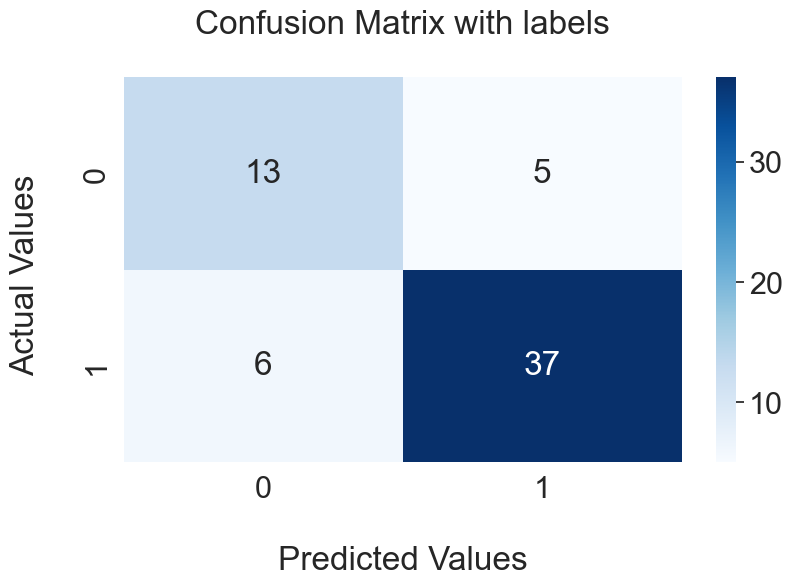

In [69]:
# visualization of the Confusion Matrix
sns.set(font_scale=2)

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values \n');

ax.yaxis.set_ticklabels(['0','1'])
ax.xaxis.set_ticklabels(['0','1'])

plt.show()

In [70]:
metrics.accuracy_score(y_test, y_pred)

0.819672131147541

In [71]:
metrics.precision_score(y_test, y_pred)

0.8809523809523809

In [72]:
metrics.recall_score(y_test, y_pred)

0.8604651162790697

In [73]:
probs = log_reg.predict_proba(X_test)

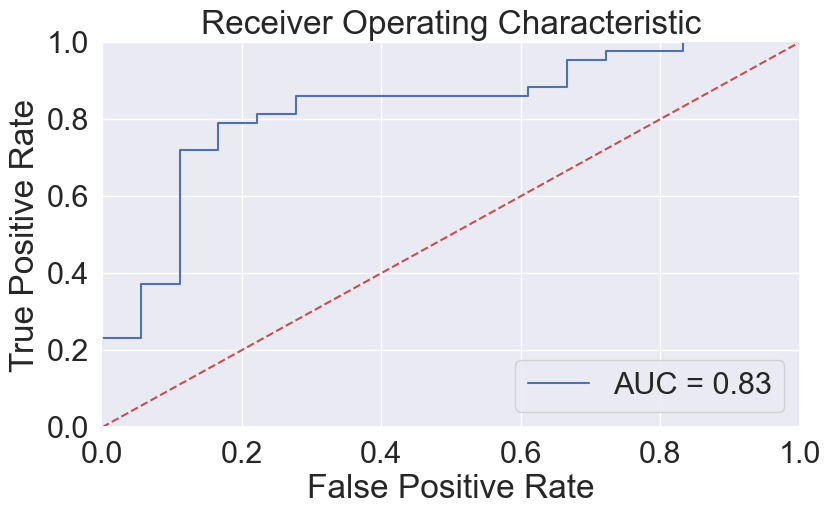

In [74]:
# calculate the fpr and tpr for all thresholds of the classification
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve and print the AUC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()